In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
#read in the list of videos contained in the csv
df = pd.read_csv('vidz.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'vidz.csv'

In [ ]:
#drop columns with redundant information
df = df.drop(columns=['comments_disabled', 'ratings_disabled' ,'thumbnail_link'])

In [ ]:
df.categoryId = df.categoryId.astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       200 non-null    object 
 1   title          200 non-null    object 
 2   publishedAt    200 non-null    object 
 3   channelTitle   200 non-null    object 
 4   categoryId     200 non-null    object 
 5   trending_date  200 non-null    object 
 6   tags           200 non-null    object 
 7   view_count     200 non-null    int64  
 8   likes          200 non-null    int64  
 9   comment_count  199 non-null    float64
 10  description    200 non-null    object 
 11  duration       200 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 18.9+ KB


## Convert to datetime --> ppublised at, trending date, duration (timedelta)

In [ ]:
#convert publishedAT to datetime column
df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
df.publishedAt

0     2022-10-26 22:00:09+00:00
1     2022-10-26 15:58:27+00:00
2     2022-10-27 00:18:46+00:00
3     2022-10-27 00:00:09+00:00
4     2022-10-26 05:06:26+00:00
                 ...           
195   2022-10-21 20:48:29+00:00
196   2022-10-20 20:00:01+00:00
197   2022-10-21 04:01:22+00:00
198   2022-10-23 16:00:08+00:00
199   2022-10-20 09:43:11+00:00
Name: publishedAt, Length: 200, dtype: datetime64[ns, UTC]

In [ ]:
#set date to next day in order to capture videos released at different times in different time zones
df.trending_date = '22.28.10'

In [ ]:
#convert trending to datetime column
df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
df.trending_date

0     2022-10-28 00:00:00+00:00
1     2022-10-28 00:00:00+00:00
2     2022-10-28 00:00:00+00:00
3     2022-10-28 00:00:00+00:00
4     2022-10-28 00:00:00+00:00
                 ...           
195   2022-10-28 00:00:00+00:00
196   2022-10-28 00:00:00+00:00
197   2022-10-28 00:00:00+00:00
198   2022-10-28 00:00:00+00:00
199   2022-10-28 00:00:00+00:00
Name: trending_date, Length: 200, dtype: datetime64[ns, UTC]

In [ ]:
#import tzinfo inorder to strip time zone information from published at. 
#this makes it a "naive" datetime object. may want to change this approach
# from datetime import tzinfo

# df.loc[1,'publishedAt'].replace(tzinfo=None)
#strips the timezone from each row
# for n in range(0,200):
#     df.loc[n,'publishedAt']= df.loc[n,'publishedAt'].replace(tzinfo=None)
# df.loc[10, ['publishedAt']]

In [ ]:
#create age column. may want to give timezone info to trending date instead of removing it from pblishedAt
df['age']=(df.trending_date - df.publishedAt)

In [ ]:
df.age.sort_values().head(10)

10   0 days 19:55:54
18   0 days 19:59:53
15   0 days 21:59:50
11   0 days 23:40:21
2    0 days 23:41:14
3    0 days 23:59:51
21   0 days 23:59:52
6    1 days 01:48:57
0    1 days 01:59:51
8    1 days 02:59:52
Name: age, dtype: timedelta64[ns]

## View:Like ratio that can score the video | view:comment ratio

Have them all as a weighted ratio

df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count

In [ ]:
#creates engagement metric. not sure how to do weightd columns really
#df['engagement'] = (df.view_count - df.likes) + (df.likes * 2) + (df.comment_count * 4) 
df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count

In [ ]:
df.engagement

0      0.137897
1      0.040702
2      0.100914
3      0.099933
4      0.016842
         ...   
195    0.085803
196    0.041752
197    0.094759
198    0.081997
199    0.040904
Name: engagement, Length: 200, dtype: float64

## Is the video sponsored?


In [ ]:
#adds sponsored column based on appearance of word sponsored in the description
df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
df[df.description.str.contains('sponsored')].shape

(6, 15)

## Video language


## Percent of capital letters in title 


## Age restricted


## When we talk about subscribers we can take a look at age of channel


## How to drive up subscribers is a slightly separate question but we can ask it


## At what point does the video view count pass the subscriber view count


## Let’s think about tags and how many words they have in common with the descriptions


In [ ]:
#countes number of tags given to video BEFORE stripping out extraneous things
df['num_of_tags'] = df.tags.str.split('|').str.len()

In [ ]:
#gets rid of separator
df.tags = df.tags.str.replace('|'," ")

/var/folders/x7/9w9mh0fd73zg4jr8l_9v9h840000gn/T/ipykernel_11953/1604276903.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.tags = df.tags.str.replace('|'," ")


In [ ]:
#Imports spacy
import spacy

In [ ]:
#creates the nlp object that is going to do the heavy lifting
nlp = spacy.load("en_core_web_sm")

In [ ]:
#uses the nlp object to convert the input text into a doc
doc = nlp(df.loc[0].tags)

In [ ]:
#goes through tokens (words) in each doc
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

lil         PROPN     nmod      
durk        PROPN     amod      
lil         PROPN     nmod      
durk        PROPN     compound  
music       PROPN     nmod      
lil         PROPN     nummod    
durk        PROPN     compound  
music       NOUN      compound  
video       NOUN      nsubj     
just        ADV       advmod    
cause       VERB      mark      
y           PRON      nsubj     
all         PRON      appos     
waited      VERB      ROOT      
2           NUM       nummod    
lil         NOUN      compound  
durk        PROPN     dobj      
2020        NUM       nummod    
just        ADV       advmod    
cause       VERB      mark      
y'          PRON      nsubj     
all         PRON      appos     
waited      VERB      advcl     
2           NUM       nummod    
durkio      NOUN      dobj      
smurkio     VERB      conj      
lil         PROPN     compound  
durk        PROPN     amod      
official    ADJ       amod      
drill       NOUN      dobj      
drill     

In [ ]:
#creates set of unique words in doc 
tokens = set()
for token in doc:
    tokens.add(token.text)
print(tokens)

{'2020', 'smurkio', 'music', 'video', 'durkio', 'OTF', 'cause', 'just', '2', 'hop', 'family', "y'", 'lil', 'chicago', 'hip', 'official', 'y', 'only', 'durk', 'the', 'drill', 'waited', 'all'}


In [ ]:
docb = nlp(df.loc[4].description)

In [ ]:
for token in docb:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

# Iterate over the predicted entities
for ent in docb.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

The         DET       det       
Inside      PROPN     compound  
fellas      NOUN      nsubj     
break       VERB      ROOT      
down        ADP       prt       
the         DET       det       
Klay        PROPN     compound  
-           PUNCT     punct     
Dbook       NOUN      compound  
interaction NOUN      dobj      
and         CCONJ     cc        
recap       VERB      conj      
Warriors    PROPN     compound  
-           PUNCT     punct     
Suns        PROPN     dobj      
on          ADP       prep      
TNT         PROPN     pobj      
.           PUNCT     punct     
Watch       VERB      ROOT      
highlights  NOUN      dobj      
from        ADP       prep      
Inside      ADP       prep      
the         DET       det       
NBA         PROPN     pobj      
with        ADP       prep      
Shaq        PROPN     pobj      
,           PUNCT     punct     
Charles     PROPN     compound  
Barkley     PROPN     conj      
,           PUNCT     punct     
Kenny     

In [ ]:
tokens = set()
for token in docb:
    if token.pos_ not in ['SYM', 'PUNCT', 'DET']:
        print(token.pos_)
        tokens.add(token.text)

for ent in docb.ents:
    print(ent.text, ent.label_)

PROPN
NOUN
VERB
ADP
PROPN
NOUN
NOUN
CCONJ
VERB
PROPN
PROPN
ADP
PROPN
VERB
NOUN
ADP
ADP
PROPN
ADP
PROPN
PROPN
PROPN
PROPN
PROPN
CCONJ
PROPN
PROPN
CCONJ
ADJ
VERB
ADV
PART
AUX
VERB
ADP
ADJ
NOUN
X
SPACE
PROPN
ADP
PROPN
ADP
PROPN
SPACE
VERB
PROPN
ADP
PROPN
ADP
PROPN
NOUN
SPACE
ADP
PROPN
ADP
PROPN
ADP
PROPN
NOUN
SPACE
VERB
PROPN
ADP
PROPN
ADP
PROPN
X
Warriors-Suns ORG
TNT ORG
NBA ORG
Charles Barkley PERSON
Kenny Smith PERSON
Ernie Johnson PERSON
NBA ORG
TNT ORG
TNT ORG
NBA ORG
TNT ORG
TNT ORG
Instagram ORG


In [ ]:
for ent in docb.ents:
    print(ent.text, ent.label_)

Warriors-Suns ORG
TNT ORG
NBA ORG
Charles Barkley PERSON
Kenny Smith PERSON
Ernie Johnson PERSON
NBA ORG
TNT ORG
TNT ORG
NBA ORG
TNT ORG
TNT ORG
Instagram ORG


In [ ]:
def clean_text(text):
    """ 
    Purpose:
        to clean text input into function by removing duplicate words, punctuations, and other things
    ---
    Parameters:
        text: a string
    ---
    Returns:
        tokens: a set of words found in the input text
    """

    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    tokens = set()
    
    for token in doc:
        if token.pos_ not in ['SYM', 'PUNCT', 'DET']:
            tokens.add(token.text)

    for ent in doc.ents:
        tokens.add(ent.text)

    return tokens
    
    

In [ ]:
df['cleaned_tags'] =  df['description'].apply(lambda x: clean_text(x))

In [ ]:
df['cleaned_desc'] = df['description'].apply(lambda x: clean_text(x))

## Think about combining the countries top 25 lists and control for duplicates. 
* This way we can classify what videos have been a top 25 video 


## We can target placing videos in/out of the top 25 


In [ ]:
#create rank and top 25 categories

In [ ]:
df['rank'] = df.index + 1

In [ ]:
df['top_25'] = np.where(df['rank'] < 26, 1, 0)

In [ ]:
df.top_25

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Name: top_25, Length: 200, dtype: int64

## Convert Duration

In [ ]:
df.duration.head(20)

0      PT3M45S
1      PT10M1S
2      PT9M42S
3     PT10M40S
4      PT9M29S
5       PT7M5S
6      PT1M32S
7      PT5M54S
8        PT26S
9      PT3M47S
10    PT16M34S
11      PT2M2S
12     PT1M15S
13     PT1M50S
14     PT3M39S
15     PT3M37S
16     PT4M25S
17       PT38S
18     PT2M50S
19     PT2M20S
Name: duration, dtype: object

In [ ]:
testy = 'PT3M45S'

In [ ]:
testy.__contains__('M')

True

In [ ]:
def clean_duration(duration):

    if 'S' not in duration:
        duration += '00S'

    if duration.__contains__('M'):
        duration = int(duration.split('M')[0].split('T')[1]) * 60 + int(duration.split('M')[1][:-1])
    else:
        duration = int(duration[-3:-1])

    return duration

In [ ]:
df['duration'] = df['duration'].apply(lambda x:clean_duration(x))

In [ ]:
df['duration']

0       225
1       601
2       582
3       640
4       569
       ... 
195    2462
196     506
197     228
198    1954
199     185
Name: duration, Length: 200, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       200 non-null    object             
 1   title          200 non-null    object             
 2   publishedAt    200 non-null    datetime64[ns, UTC]
 3   channelTitle   200 non-null    object             
 4   categoryId     200 non-null    object             
 5   trending_date  200 non-null    datetime64[ns, UTC]
 6   tags           200 non-null    object             
 7   view_count     200 non-null    int64              
 8   likes          200 non-null    int64              
 9   comment_count  199 non-null    float64            
 10  description    200 non-null    object             
 11  duration       200 non-null    int64              
 12  age            200 non-null    timedelta64[ns]    
 13  engagement     199 non-null    float64            

# Exploration

<AxesSubplot:>

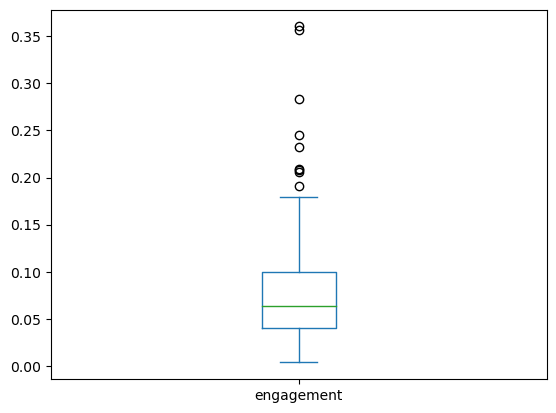

In [ ]:
df.engagement.plot.box()

<AxesSubplot:>

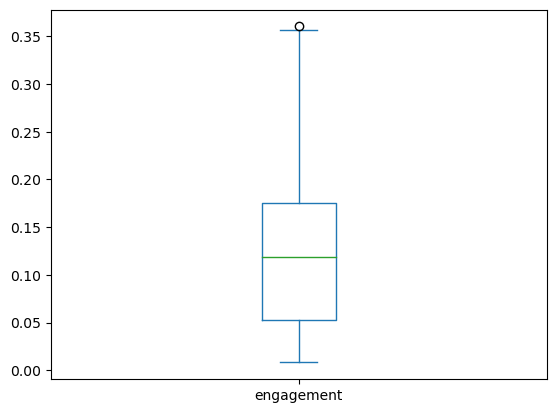

In [ ]:
df[df.top_25 == 1].engagement.plot.box()

<AxesSubplot:>

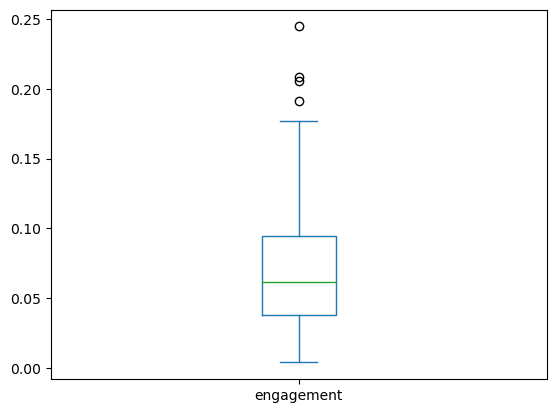

In [ ]:
df[df.top_25 != 1].engagement.plot.box()

## Takeaways
* engagement higher with top 25 videos

In [4]:
import pandas as pd
df = pd.read_pickle('prepared.pkl')
df["channelId"] = np.nan
df

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,engagement,sponsored,num_of_tags,word_bank,cleaned_tags,cleaned_desc,title_in_description,title_in_tags,pct_tags_in_description,channelId
0,sWwHWK7OYJ8,[ENG][아형✪하이라이트] (여자)아이들 완전체 떴다↗ 멋짐 폭발♥ 5인 5색 토...,2022-10-29 13:26:44+00:00,아는형님 Knowingbros,Entertainment,2022-11-02 00:00:00+00:00,아는 형님 형님 형님 학교 미연 민니 소연 우기 슈화 아이들 여자아이들 강호동 이수...,1098919,19090,861,...,0.020506,0,67,"[[, 아형, ✪, 하이라이트, 여자)아이들, 완전체, 떴다, ↗, 멋짐, 폭발, ...","{슈화, 김희철, 미모서열, 공주병, 김영철, 아는, 우기, 사랑, Nxde직캠 N...","{토요일, 아형, 5인, 저녁, ✪, 토크 모음.zip#아는형님, 공홈에서, 형님〉...",0,0,0.013889,NaN
1,1_VsbIFIh8U,10 Things Jin (진) of BTS (방탄소년단) Can't Live Wi...,2022-10-31 16:00:16+00:00,GQ,Entertainment,2022-11-02 00:00:00+00:00,(방탄소년단) (방탄소년단) gq 10 essentials 10 essentials...,1670293,231953,6345,...,0.154065,0,35,"[There, are, few, things, Jin, 진, of, BTS, ca,...","{진, menswear, want, magazine, interview, stuff...","{진, providing, modern, and, single, Good, Thom...",0,0,0.371429,NaN
2,SFVzIrEYQKU,[#편스토랑] 박수홍 신혼집 대공개❤ 애정 가득한 인테리어에 깨소금 냄새!!|KBS...,2022-10-29 09:30:05+00:00,KBS 한국방송,Entertainment,2022-11-02 00:00:00+00:00,KBS 한국방송공사 mylovekbs 예고 티저 김나영 붐 나영 수홍 박수홍엄마 유...,841292,12902,1378,...,0.021888,0,26,"[박수홍, 신혼집, 대공개, ❤, 애정, 가득한, 인테리어에, 깨소금, 냄새!!0:...","{찬원축가, 이찬원, 대접요리, 이찬원직캠, 박수홍엄마, 김나영, 유재석, 만드는방...","{가득한 인테리어에 깨소금 냄새!!0:56 편스토랑 출연을 결심하게 된, 이찬원, ...",0,0,0.111111,NaN
3,c6ASQOwKkhk,진 (Jin) 'The Astronaut' Official MV,2022-10-28 04:00:01+00:00,HYBE LABELS,Music,2022-11-02 00:00:00+00:00,HYBE HYBE LABELS 하이브 하이브레이블즈,30998614,4340713,501383,...,0.204727,0,4,"[진, Jin, Astronaut, ', Official, MVCredits, ,...","{HYBE, 하이브, LABELS, HYBE HYBE, 하이브레이블즈}","{Mu, NieblasSet, Nwachukwu1st, BuckleyFeatured...",1,0,0.000000,NaN
4,CYn8OlO7cbg,솔의눈 슬러시가 최약체인 키친마이야르 시즌3 신메뉴 제작기,2022-10-31 11:15:01+00:00,승우아빠,Entertainment,2022-11-02 00:00:00+00:00,승우아빠 키친마이야르 시즌3메뉴 신메뉴 키친마이야르 신메뉴 솔의눈 솔의눈 슬러시 키...,343269,5389,581,...,0.022469,0,11,"[승우아빠, 키친마이야르, #, 시즌3오늘은, 키친마이야르, 시즌3의, 신, 메뉴,...","{내꺼내먹, 승우아빠, 신메뉴, 시즌3메뉴, 슬러시, 키친마이야르, 솔의눈}","{입니다정식메뉴, 리뷰는, 생방송, 문의, 키친마이야르, 택배수령주소, 🎁, 승우아...",0,0,0.285714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,8Itwp2_LMr0,"Cash | Like, Share & Subscribe Team-Santosh So...",2022-10-29 18:00:03+00:00,etvteluguindia,Entertainment,2022-11-02 00:00:00+00:00,cash latest promo latest promo cash promo late...,929198,13829,193,...,0.015714,0,20,"[cash, telugushow, #, etvwin, sumakanakala, sa...","{Santosh Sobhan Faria Abdullah, program, Abdul...","{► Pin, http://etv.co.in, Telugu(Youtube, Visi...",0,0,0.714286,NaN
156,-65G3J2Ylo4,Crazy couples తో...? || Mahishivan || Tamada ...,2022-10-29 05:30:00+00:00,Mahishivan,Entertainment,2022-11-02 00:00:00+00:00,Mahishivan dyson dyson airwrap Tamada Media Ma...,459905,15560,371,...,0.037060,0,28,"[Indulge, in, Vilvah, ’s, collection, of, orga...","{Maheshwari, couples, vlogs, dyson, Actress, s...","{and, Get, hair, Us, more, n't, Teluguactress,...",0,0,0.000000,NaN
157,NyHW-zcU77Q,ഒരു കലിപ്പൻ കാന്താരി അപാരതPLUS2 KAADHALI | AME...,2022-10-28 11:30:06+00:00,Sha media,Entertainment,2022-11-02 00:00:00+00:00,ameer ameersha new Shortfilimmalayalam Malayal...,197112,15182,280,...,0.082704,0,8,"[Download, India, 's, 1, audio, book, platform...",{Shortfilimmalayalam Malayalam Shortfilm Trend...,"{Vyshak, and, Alan, SHA200EPISODE, that, off, ...",0,0,0.000000,NaN
158,jpGofgAkQjI,rarest HONDA'S SUPERBIKE with handbrake 😱😜,2022-10-30 05:30:07+00:00,JS Films,People_Blogs,2022-11-02 00:00:00+00:00,JS Films Vlogger youtuber jaysn jasminder sing...,395480,24540,394,...,0.066036,0,24,"[Follow, on, Instagram, https://www.instagram....","{hinglish, hayabusa, Vlogger, content, vlogs, ...","{TRUCK, https://www.youtube.com/c/JaysnNation,...",0,0,0.083333,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9536 entries, 0 to 159
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 9536 non-null   object             
 1   title                    9536 non-null   object             
 2   publishedAt              9536 non-null   datetime64[ns, UTC]
 3   channelTitle             9536 non-null   object             
 4   categoryId               9536 non-null   object             
 5   trending_date            9536 non-null   datetime64[ns, UTC]
 6   tags                     9536 non-null   object             
 7   view_count               9536 non-null   int64              
 8   likes                    9536 non-null   int64              
 9   comment_count            9536 non-null   int64              
 10  thumbnail_link           9536 non-null   object             
 11  comments_disabled        9536 n

In [ ]:
vid

,0
0,sWwHWK7OYJ8
1,1_VsbIFIh8U
2,SFVzIrEYQKU
3,c6ASQOwKkhk
4,CYn8OlO7cbg
...,...
9531,8Itwp2_LMr0
9532,-65G3J2Ylo4
9533,NyHW-zcU77Q
9534,jpGofgAkQjI


In [ ]:
df.video_id.to_csv('video_ids.txt',index=False)

array(['아는형님 Knowingbros', 'GQ', 'KBS 한국방송', 'HYBE LABELS', '승우아빠',
       'tvN SPORTS', '올리버쌤', 'BANGTANTV', 'sogyo table 소교식탁TV', 'LCK',
       'CLAB', '차박차박 Chabak', '에스오디 SOD', 'NB couple엔비커플', 'NCT',
       'EBSCulture (EBS 교양)', 'KFATV_LIVE', '썸머썸머Summer in New York',
       '도장TV', '워크맨-Workman', '장민호', '한혜진 Han Hye Jin', '이국주', 'Hoy',
       'BERTH-OH', 'De Todo Un Mucho', 'Marca Claro', 'xTurbo',
       'Joey Drew Studios', 'Luisito Comunica', 'Clash of Clans',
       'EA SPORTS FIFA', 'Quavo Huncho', 'Dtoke Free', 'TV Ana Emilia',
       'Conoce a Arnold', 'ElMalillaTv', 'Rica Famosa Latina',
       'Sonic the Hedgehog', 'Genshin Impact', 'Rivers', 'Pancracio',
       'MaireWink', 'Fortnite', 'Alejo Igoa', 'La Vanguardia',
       'Bronzo Español', 'Jinseop Coreano', 'Mcfly et Carlito', 'SpaceX',
       'Alpha Betas', 'Entertainment Tonight', 'Hailey Rhode Bieber',
       'FOX 2 St. Louis', 'RealLifeLore', 'Safiya Nygaard',
       'JxmyHighroller', 'IGN', 'SteveDangle', 'Deest

In [ ]:
one_df = df.copy()

In [ ]:
one_df = one_df.drop_duplicates('channelTitle')

In [ ]:
one_df.video_id.to_csv('video_ids.txt',index=False)

In [ ]:
import os
import glob
import pandas as pd
#set working directory
os.chdir("/Users/vincentbanuelos/codeup-data-science/top_200/output")

#find all csv files in the folder
#use glob pattern matching -> extension = 'csv'
#save result in list -> all_filenames
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#print(all_filenames)

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [15]:
import os
import glob
import pandas as pd
#set working directory
os.chdir("/Users/vincentbanuelos/codeup-data-science/top_200/channeloutput")

#find all csv files in the folder
#use glob pattern matching -> extension = 'csv'
#save result in list -> all_filenames
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#print(all_filenames)

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_channel.csv", index=False, encoding='utf-8-sig')